In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import gdown

In [3]:
!gdown 1Zaclyhh9oYWHDMq3gEHKJRcgB0GD9lT5

Downloading...
From: https://drive.google.com/uc?id=1Zaclyhh9oYWHDMq3gEHKJRcgB0GD9lT5
To: /home/rafael/Code/Wine.csv
100%|██████████████████████████████████████| 11.5k/11.5k [00:00<00:00, 30.0MB/s]


In [4]:
df = pd.read_csv('Wine.csv')

In [5]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


| Variável               | Tipo      | Descrição |
|------------------------|-----------|-----------|
| Alcohol                | Numérica  | Teor alcoólico do vinho (percentual) |
| Malic_Acid             | Numérica  | Quantidade de ácido málico no vinho (g/l) |
| Ash                    | Numérica  | Quantidade de cinzas no vinho (g/l) |
| Ash_Alcanity           | Numérica  | Alcalinidade das cinzas no vinho (medida em pH) |
| Magnesium              | Numérica  | Quantidade de magnésio no vinho (mg/l) |
| Total_Phenols          | Numérica  | Quantidade total de fenóis no vinho (g/l) |
| Flavanoids             | Numérica  | Quantidade de flavonoides no vinho (g/l) |
| Nonflavanoid_Phenols   | Numérica  | Quantidade de fenóis não flavonoides no vinho (g/l) |
| Proanthocyanins        | Numérica  | Quantidade de proantocianidinas no vinho (g/l) |
| Color_Intensity        | Numérica  | Intensidade da cor do vinho |
| Hue                    | Numérica  | Matiz da cor do vinho |
| OD280                  | Numérica  | Medida de absorvância óptica do vinho a 280 nm (OD280/OD315 de vinhos diluídos) |
| Proline                | Numérica  | Quantidade de prolina no vinho (mg/l) |
| Customer_Segment       | Categórica | Segmento de clientes para o qual o vinho é mais adequado |



In [7]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:

 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [20]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
 
cm = confusion_matrix(y_test, y_pred)

/tmp/ipykernel_155440/2999268328.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


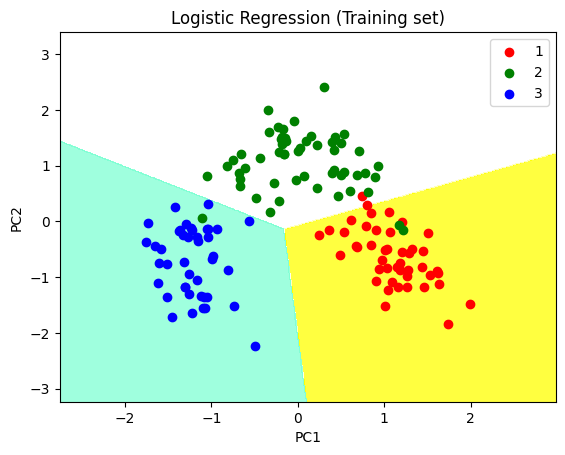

In [23]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Regressão Logística(Training set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend() 

plt.show()

/tmp/ipykernel_155440/99634740.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


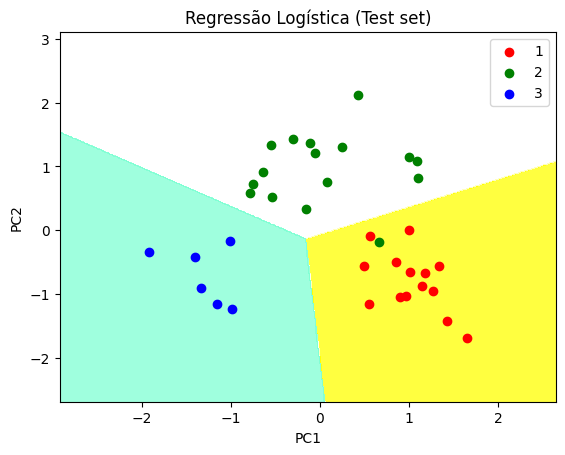

In [24]:


 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Regressão Logística (Test set)') 
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()
 

plt.show()

In [25]:
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)

print(loadings)

                           PC1       PC2       PC3       PC4       PC5  \
Alcohol               0.144329 -0.483652 -0.207383 -0.017856 -0.265664   
Malic_Acid           -0.245188 -0.224931  0.089013  0.536890  0.035214   
Ash                  -0.002051 -0.316069  0.626224 -0.214176 -0.143025   
Ash_Alcanity         -0.239320  0.010591  0.612080  0.060859  0.066103   
Magnesium             0.141992 -0.299634  0.130757 -0.351797  0.727049   
Total_Phenols         0.394661 -0.065040  0.146179  0.198068 -0.149318   
Flavanoids            0.422934  0.003360  0.150682  0.152295 -0.109026   
Nonflavanoid_Phenols -0.298533 -0.028779  0.170368 -0.203301 -0.500703   
Proanthocyanins       0.313429 -0.039302  0.149454  0.399057  0.136860   
Color_Intensity      -0.088617 -0.529996 -0.137306  0.065926 -0.076437   
Hue                   0.296715  0.279235  0.085222 -0.427771 -0.173615   
OD280                 0.376167  0.164496  0.166005  0.184121 -0.101161   
Proline               0.286752 -0.3649